In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline

In [15]:
def warmUpExercise():
    return(np.identity(5))

In [16]:
warmUpExercise()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [17]:
def featureNormalize(X):
    return np.divide((X - np.mean(X,axis=0)),np.std(X,axis=0))

In [18]:
data = np.loadtxt('data/ex2data1.txt', delimiter=',')
s = np.c_[data[:,0]]
r = np.c_[data[:,1]]
y = np.c_[data[:,2]]
X = np.c_[s,r]
X = featureNormalize(X)
X = np.c_[np.ones(data.shape[0]),X]

In [19]:
def computeCost(X, y, theta = [[0],[0],[0]]):
    m = y.size
    J = 0
    
    h = X.dot(theta)
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    return(J)

In [20]:
computeCost(X,y)

0.29999999999999999

In [21]:
def gradientDescent(X, y, theta = [[0],[0],[0]], alpha=0.05, num_iters=400):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X, y, theta)
    return(theta, J_history)

theta:  [ 0.6         0.28732953  0.25778568]


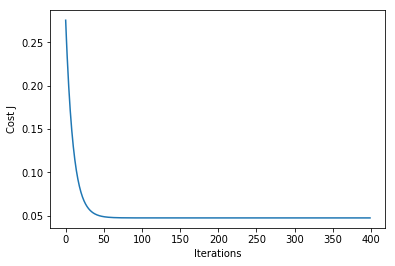

In [22]:
# theta for minimized cost J
theta , Cost_J = gradientDescent(X, y)
print('theta: ',theta.ravel())

plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

In [12]:
# Estimate the price of a 1650 sq-ft, 3 br house

# Recall that the first column of X is all-ones. Thus, it does
# not need to be normalized.
normalized_specs = np.array([1,((1650-s.mean())/s.std()),((3-r.mean())/r.std())])
price = np.dot(normalized_specs,theta) 


print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n ',
      price)


Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
  [ 23.23177289]
